# Bike Price Prediction Using Linear Regression

## Import Library

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

## Get the First 5 Rows of Dataframe

In [74]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


## Get Information of the Dataframe

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


## Get Missing Values Drop

In [76]:
df=df.dropna()

## Get the Summary Statistics

In [77]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


## Get the Categories and counts of Categorical Variables

In [78]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [79]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [80]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [81]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

## Get Column Names

In [82]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

## Get Shape of DataFrame

In [83]:
df.shape

(626, 8)

## Get Encoding of Categorical Features

In [84]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [85]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1, '3rd owner':2, '4th owner':3}},inplace=True)

## Define y (dependent or label or target variable) and X (independent or features or attribute Variable)

In [86]:
y=df['Selling_Price']

In [87]:
y.shape

(626,)

In [88]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [89]:
x= df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [90]:
x.shape

(626, 5)

In [91]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


## Get Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=182529)

In [94]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

## Get Model Train

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [96]:
lr.fit(x_train, y_train)

LinearRegression()

## Get Model Prediction

In [97]:
y_pred = lr.predict(x_test)

In [98]:
y_pred.shape

(188,)

In [99]:
y_pred

array([ 55615.80162028,  25068.77589296, 134759.6639238 , 104269.38799288,
        21204.2967034 ,  49810.79452958, 886875.5354534 ,  37834.64034566,
        78684.84191763,  32382.74591186,  54289.43912633,  27625.23044237,
        25130.2938446 ,  53437.48206731,  25008.28572125,  51434.42078047,
        49838.81676917,  59344.45137406,  24585.65672648,  29774.0409838 ,
        54948.04890398,  46123.67404191,  66174.89538897,  59142.69453494,
        16595.45993569,  64844.35279176,  24653.67590529,  50458.22299663,
        51186.7866373 ,  74720.28527804,  59273.02498281, 115582.15005904,
        68730.29037242, 141611.28957402,  36877.68198787,  45584.586911  ,
        40762.53747675,  34025.53531026,  29452.25695026, 111562.38122164,
        39371.98757236,  57313.16134495,  36793.85614854, 129378.99801061,
        65545.07404789,  31980.63192973,  30772.09114289,  51745.28149389,
        22525.24774628,  29060.42321644,  57313.41182521, 109576.24719094,
        45631.49718738,  

## Get Model Evaluation

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [101]:
mean_squared_error(y_test,y_pred)

630344053.5400125

In [102]:
mean_absolute_error(y_test,y_pred)

12860.03271955968

In [103]:
r2_score(y_test,y_pred)

0.906191330076582

## Get Visualization of Actual Vs Predicted Results

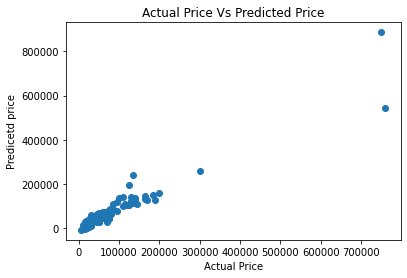

In [104]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicetd price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

## Get Future Predictions

In [105]:
data=df.sample(1)

In [106]:
data

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
32,Mahindra,Mahindra Rodeo,20000,2013,0,0,7000,47343.0


In [107]:
data.shape

(1, 8)

In [108]:
x_new = data.drop(['Brand','Model','Selling_Price'],axis=1)

In [109]:
x_new

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
32,2013,0,0,7000,47343.0


In [110]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 32 to 32
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1 non-null      int64  
 1   Seller_Type        1 non-null      int64  
 2   Owner              1 non-null      int64  
 3   KM_Driven          1 non-null      int64  
 4   Ex_Showroom_Price  1 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 48.0 bytes


In [111]:
y_pred_new=lr.predict(x_new)

In [112]:
y_pred_new

array([23659.05553051])

In [113]:
a=int(input("Enter the Year: \n"))
b=int(input("Enter the Seller Type [0 for Individual and 1 for Dealer]\n"))
c=int(input("Enter the Owner Type [0 for First 1 for second 2 for third and 3 for Fourth hand owner]\n"))
d=int(input("Enter the Kms Travelled\n"))
e=float(input("Enter the Ex Showroom Price\n"))

Enter the Year: 
2013
Enter the Seller Type [0 for Individual and 1 for Dealer]
0
Enter the Owner Type [0 for First 1 for second 2 for third and 3 for Fourth hand owner]
0
Enter the Kms Travelled
7000
Enter the Ex Showroom Price
47343


In [114]:
rish = pd.DataFrame({'Year':[a], 'Seller_Type':[b], 'Owner':[c], 'KM_Driven':[d], 'Ex_Showroom_Price':[e]})

In [115]:
rish

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2013,0,0,7000,47343.0


In [116]:
ritz=lr.predict(rish)

In [117]:
ritz

array([23659.05553051])